Matplotlib global setup for quantumarticle completed.


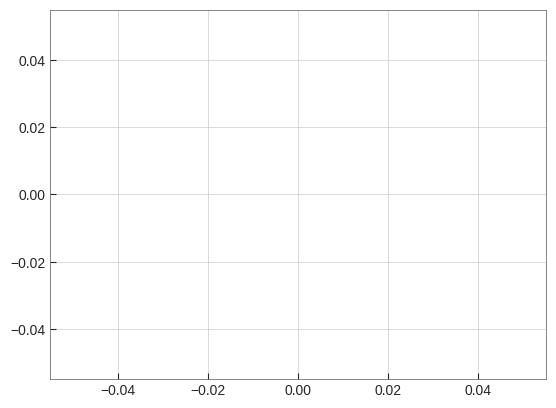

In [2]:
import numpy             as     np
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}

_wide_widths = {
    # a4paper wide columnwidth = 426.79135 pt = 5.93 in
    # letterpaper wide columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper wide linewidth = 483.69687 pt = 6.72 in
    # letterpaper wide linewidth = 500.48400 pt = 6.95 in
    'twocolumn': {
        'a4paper' : 6.72,
        'letterpaper' : 6.95
    }
}

_fontsizes = {
    10 : {
        'tiny' : 5,
        'scriptsize' : 7,
        'footnotesize' : 8, 
        'titlesize' : 10,
        'small' : 9, 
        'normalsize' : 10,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' : 20,
        'Huge' : 25
    },
    11 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 9, 
        'titlesize' : 10,
        'small' : 10, 
        'normalsize' : 11,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' :  20,
        'Huge' :  25
    },
    12 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 10,
        'titlesize' : 10, 
        'small' : 11, 
        'normalsize' : 12,
        'large' : 14, 
        'Large' : 17, 
        'LARGE' : 20,
        'huge' :  25,
        'Huge' :  25
    }
}

_width         = 1
_wide_width    = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
        
    # Seaborn white is a good base style
    plt.style.use(['seaborn-v0_8-whitegrid', './quantum-plots.mplstyle'])
    
    try:        
        # This hackery is necessary so that jupyther shows the plots
        mpl.use("pgf")
        %matplotlib inline
        plt.plot()
        mpl.use("pgf")
    except:
        print('Call to matplotlib.use had no effect')
        
    mpl.interactive(False)
    
    # Now prepare the styling that depends on the settings of the document
    
    global _width 
    _width = _widths[columns][paper]
    
    global _wide_width 
    _wide_width = _wide_widths[columns][paper]
    
    # Use the default fontsize scaling of LaTeX
    global _fontsizes
    fontsizes = _fontsizes[fontsize]
    
    plt.rcParams['axes.labelsize'] = fontsizes['small']
    plt.rcParams['axes.titlesize'] = fontsizes['large']
    plt.rcParams['xtick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['ytick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['font.size'] = fontsizes['small']
    plt.rcParams['figure.titlesize'] = fontsizes['small']
    
    return {
            'fontsizes' : fontsizes,
            'colors' : {
                'quantumviolet' : _quantumviolet,
                'quantumgray' : _quantumgray
            }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         .8 of the regular width
#         defaults to 1.0
#
#     wide : bool 
#         indicates if the figures spans two columns in twocolumn mode, i.e.
#         when the figure* environment is used, has no effect in onecolumn mode 
#         defaults to False
#
#     (returns) : matplotlib figure object
#         the initialized figure object

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0, wide = False):
    width = (_wide_width if wide else _width) * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    
global_setup()
print("Matplotlib global setup for quantumarticle completed.")

In [19]:
from dataclasses import dataclass
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.ndimage import uniform_filter1d

# Parameters for plotting
decoder_colors = {
    'uf': [
        "#6baed6", "#4292c6", "#3182bd", "#1f77b4", "#2171b5",
        "#08519c", "#08306b", "#08519c", "#08306b", "#08306b",
    ],
    'clayg': [
        "#fdae6b", "#ffbb78", "#ff8c00", "#fd8d3c", "#ffa726",
        "#f16913", "#ff7f0e", "#d95f02", "#d94801", "#a63603",
    ],
    'sl_clayg': [
        "#31a354", "#74c476", "#238b45", "#31a354", "#74c476",
        "#006d2c", "#00441b", "#006d2c", "#00441b", "#006d2c",
    ],
    'clayg_stop_early': [
        "#525252", "#252525", "#737373", "#525252", "#252525",
        "#000000",
    ],
    'other': [
        "#e377c2", "#d62728", "#ff9896", "#c51b7d", "#8c564b",
        "#e377c2", "#d62728", "#ff9896", "#c51b7d", "#8c564b",
    ]
}

decoder_colors['clayg_lifetime_0.25'] = decoder_colors['clayg']
decoder_colors['clayg_lifetime_0.5']  = decoder_colors['sl_clayg']

decoder_names = {
    'uf': 'UF',
    'clayg': 'ClAYG',
    'sl_clayg': 'Single Layer ClAYG',
    'clayg_third_growth': 'ClAYG ⅓ Growth',
    'clayg_faster_backwards_growth': 'ClAYG w/ Faster Backwards Growth',
    'sl_clayg_third_growth': 'Single Layer ClAYG ⅓ Growth',
    'clayg_stop_early': 'ClAYG Stop Early',
    'sl_clayg_stop_early': 'Single Layer ClAYG Stop Early',
    'clayg_lifetime_0.25': 'ClAYG(0.25)',
    'clayg_lifetime_0.5': 'ClAYG(0.5)',
}

In [4]:
@dataclass
class Data:
    results: pd.DataFrame
    steps: pd.DataFrame

def collect_data(base_dirs, plot_ids) -> Data:
    results_rows = []
    steps_rows = []

    # Precompiled regex patterns
    results_file_pattern = re.compile(
        r"^(?P<decoder>(\w+(?:_\w+)*(?:_\d+(?:\.\d+)*)?))_d=(?P<distance>\d+)"
        r"(?:_(?:idlingtimeconstant|N)=(?P<N>\d+(?:\.\d+)?))?\.txt$"
    )
    steps_file_pattern = re.compile(r"([\w\._]+)_d=(\d+)_p=([\d\.]+)\.txt")

    # Collect all relevant plot folders
    plot_folders = []
    for base_dir in base_dirs:
        with os.scandir(base_dir) as it:
            for entry in it:
                if entry.is_dir():
                    if not plot_ids or any(entry.name.startswith(f"{pid}") for pid in plot_ids):
                        plot_folders.append(entry.path)

    # Process each folder
    for folder in plot_folders:
        # Process results files
        results_dir = os.path.join(folder, "results")
        if os.path.isdir(results_dir):
            with os.scandir(results_dir) as it:
                for entry in it:
                    if entry.is_file() and entry.name.endswith(".txt"):
                        match = results_file_pattern.match(entry.name)
                        if not match:
                            continue

                        decoder = match["decoder"]
                        distance = int(match["distance"])
                        N = float(match["N"]) if match["N"] else np.nan

                        # Read file into a DataFrame
                        df = pd.read_csv(
                            entry.path, sep=r"\s+", names=["p", "l", "n"],
                            comment="p", engine="python"
                        )
                        df["decoder"] = decoder
                        df["distance"] = distance
                        df["N"] = N
                        results_rows.extend(df.to_dict("records"))

        # Process steps files
        steps_dir = os.path.join(folder, "steps")
        if os.path.isdir(steps_dir):
            with os.scandir(steps_dir) as it:
                for entry in it:
                    if entry.is_file() and entry.name.endswith(".txt"):
                        match = steps_file_pattern.match(entry.name)
                        if not match:
                            continue

                        decoder, distance, p = match.groups()
                        distance = int(distance)
                        p = float(p)

                        # Read step file line by line
                        with open(entry.path, "r") as f:
                            for line in f:
                                if line.strip():
                                    parts = line.strip().split()
                                    if len(parts) != 2:
                                        continue
                                    try:
                                        steps, occurences = map(float, parts)
                                        steps_rows.append({
                                            "decoder": decoder,
                                            "distance": distance,
                                            "p": p,
                                            "value": steps,
                                            "occurences": int(occurences),
                                        })
                                    except ValueError:
                                        print(f"Skipping invalid line: {line.strip()}")

    # Return results in a Data dataclass
    data = Data(
        results=pd.DataFrame(results_rows),
        steps=pd.DataFrame(steps_rows),
    )
    return data


/tmp/ipykernel_5386/3167407628.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = data.results.groupby(['decoder', 'distance']).apply(


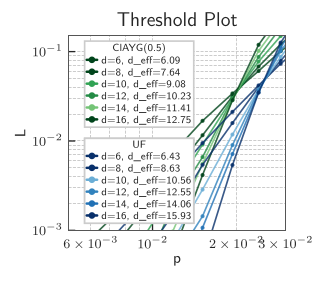

In [70]:
base_dirs = [
    "../data/ccluster/test_cluster_lifetime/results_test_cluster_lifetime/",
]

data = collect_data(base_dirs, [])
data.results = data.results[data.results['l'] > 0]
data.results = data.results[data.results['decoder'].isin(['uf', 'clayg_lifetime_0.5'])]

results = data.results.groupby(['decoder', 'distance']).apply(
    lambda x: x.set_index('p')[['l', 'n']].apply(lambda row: (row['l'], row['n']), axis=1).to_dict()
)
results_dict = results.to_dict()

error_bars = False
plot_fit = False

fig = plot_setup(aspect_ratio=0.75, width_ratio=1.0, wide=False)
ax = fig.add_subplot(1, 1, 1)

from matplotlib.lines import Line2D
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np

# Group lines per decoder
grouped_lines = {}

for (decoder, distance), values in results.items():
    colors = decoder_colors.get(decoder, decoder_colors['other'])
    decoder_name = decoder_names.get(decoder, decoder)

    ps = list(values.keys())
    ls, ns = zip(*(values.values()))
    ls = np.array(ls, dtype=float)
    ns = np.array([n if n is not None and not np.isnan(n) else 200000 for n in ns], dtype=float)

    sorted_indices = np.argsort(ps)
    ps = np.array(ps)[sorted_indices]
    ls = ls[sorted_indices]
    ns = ns[sorted_indices]

    # Wilson score interval
    z = norm.ppf(1 - 0.05 / 2)
    sigma = 1 / (1 + z**2 / ns) * (ls + z/(2*ns)*(z + np.sqrt(4*ns*ls*(1-ls))+z**2))

    def power_law(x, a, b):
        return a * np.power(x, b)

    effective_distance = None
    try:
        if len(ps) >= 2:
            popt, _ = curve_fit(power_law, ps, ls, sigma=sigma, absolute_sigma=True)
            a, b = popt
            effective_distance = abs(b) * 2
    except Exception as e:
        print(f"Fit failed for {decoder_name} d={distance}: {e}")

    color = colors[distance % len(colors)]
    label = f"d={distance}, d_eff={effective_distance:.2f}" if effective_distance else f"d={distance}"

    if error_bars:
        line = ax.errorbar(ps, ls, yerr=sigma, fmt='o-', color=color, markersize=1.5, 
                           label=label, capsize=1, linewidth=1, alpha=0.8)
    else:
        line, = ax.plot(ps, ls, 'o-', color=color, markersize=1.5, 
                        label=label, linewidth=1, alpha=0.8)

    grouped_lines.setdefault(decoder_name, []).append((line, label))

# === grouped sublegends ===
legend_x_offset = .05
for i, (dec_name, entries) in enumerate(grouped_lines.items()):
    legend_elements = [
        Line2D([0], [0], color=line.get_color(), lw=1.5, marker='o', label=label)
        for line, label in entries
    ]
    leg = ax.legend(
        handles=legend_elements,
        title=dec_name,
        loc='upper left',
        bbox_to_anchor=(legend_x_offset, 1.0-0.5*i),
        frameon=True,
        fontsize='x-small',
        handlelength=1.0,
        handletextpad=0.4,
        borderpad=0.2,
        labelspacing=0.25,
        ncol=1,
        title_fontsize='x-small',
    )
    ax.add_artist(leg)

# === Plot settings ===
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('p')
ax.set_ylabel('L')
ax.set_xbound(5e-3, 3e-2)
ax.set_ybound(1e-3, 1.5e-1)
ax.set_title('Threshold Plot')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.subplots_adjust(right=0.75)  # make room for legends on right side

plt.savefig("../paper/figures/threshold_plot.pdf", bbox_inches='tight')
fig

In [167]:
base_dirs = [
    "../data/ccluster/results_idling_d6",
]

data = collect_data(base_dirs, [])
# group by decoder, p and N, take mean of l
data_mean = data.results.groupby(['decoder', 'distance', 'N', 'p'], dropna=False).mean().reset_index()

# Choose all lines where N is NaN or 1/N <= 0.05
data_mean = data_mean[(data_mean['N'].isna()) | (1.0/data_mean['N'] <= 0.005)]

Call to matplotlib.use had no effect


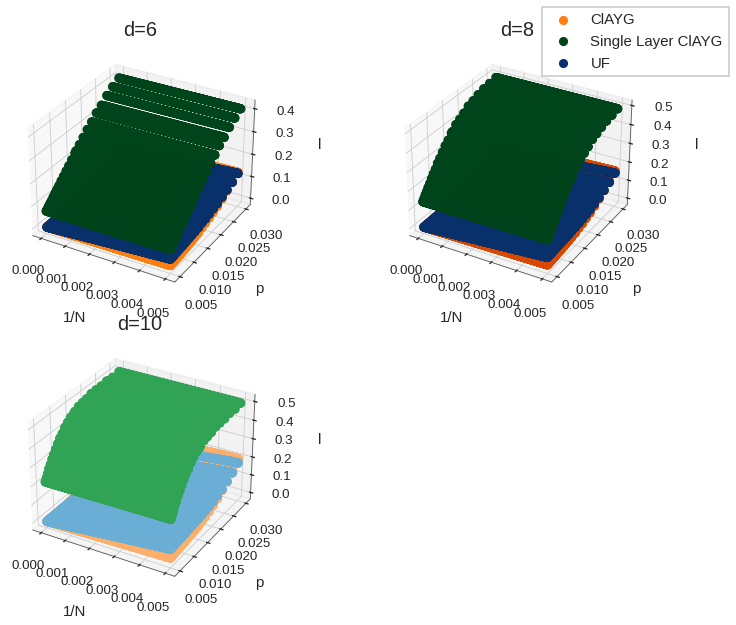

In [ ]:
global_setup()
fig = plot_setup(aspect_ratio=0.75, width_ratio=1.0, wide=True)
axes = []

distances = sorted(data_mean['distance'].unique())
cols = 2
rows = int(np.ceil(len(distances)/cols))

for idx, distance in enumerate(distances):
    ax = fig.add_subplot(rows, cols, idx+1, projection='3d')
    axes.append(ax)
    df_d = data_mean[data_mean['distance'] == distance]
    for decoder in df_d['decoder'].unique():
        df_dec = df_d[df_d['decoder']==decoder]
        x = [1.0/val if not np.isnan(val) else 0 for val in df_dec['N'].values]
        y = df_dec['p'].values
        z = df_dec['l'].values
        colors = decoder_colors.get(decoder, ['#000000'])
        color = colors[distance % len(colors)]
        ax.scatter(x, y, z, label=decoder_names.get(decoder, decoder), s=20, c=color)
    ax.set_xlabel('1/N')
    ax.set_ylabel('p')
    ax.set_zlabel('l')
    ax.set_title(f"d={distance}")

#fig.suptitle("Logical error rate vs p and 1/N (by distance)", fontsize=16)
# create a single legend outside
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.savefig("../paper/figures/logical_vs_p_and_idlingtimconstant_plot.pdf")
fig

In [193]:
def compute_thresholds(merged: pd.DataFrame, tol=1e-12):
    thresholds = []
    for invN, group in merged.groupby('inv_N'):
        group = group.sort_values('p')
        p_vals = group['p'].values
        y_vals = group['rel_diff'].values

        # Find roots of function
        for i in range(len(y_vals) - 1):
            if y_vals[i] * y_vals[i + 1] < 0:
                # Linear interpolation to find root
                p1, p2 = p_vals[i], p_vals[i + 1]
                y1, y2 = y_vals[i], y_vals[i + 1]
                p_thresh = p1 - y1 * (p2 - p1) / (y2 - y1)
                thresholds.append((invN, p_thresh))
                break

    return thresholds

def compute_thresholds_by_roots(merged: pd.DataFrame):
    thresholds = []
    for invN, group in merged.groupby('inv_N'):
        group = group.sort_values('p')
        p_vals = group['p'].values
        y_vals = group['rel_diff'].values

        # sort by p_vals
        sorted_indices = np.argsort(p_vals)
        p_vals = p_vals[sorted_indices]
        y_vals = y_vals[sorted_indices]
        
        plt.scatter(p_vals, y_vals, label=f'invN={invN}')
        
        for i in range(len(y_vals) - 1):
            if y_vals[i] * y_vals[i + 1] < 0:
                # Linear interpolation to find root
                p1, p2 = p_vals[i], p_vals[i + 1]
                y1, y2 = y_vals[i], y_vals[i + 1]
                p_thresh = p1 - y1 * (p2 - p1) / (y2 - y1)
                break

        thresholds.append((invN, p_thresh))
    
    plt.savefig("../paper/figures/thresholds_by_roots_debug.pdf")

    return thresholds

In [194]:
fig = plot_setup(aspect_ratio=4/7, width_ratio=1.0, wide=True)
axes = []
data_mean = data.results[data.results['distance'] == 10]

decoder_a, decoder_b = 'uf','clayg'
display_thresholds = True

distances = sorted(data_mean['distance'].unique())
cols = 2
cols = min(cols, len(distances))
rows = int(np.ceil(len(distances)/cols))

norm = Normalize(vmin=-1, vmax=1)
cmap = plt.get_cmap('RdBu')

for idx, distance in enumerate(distances):
    ax = fig.add_subplot(rows, cols, idx+1)
    axes.append(ax)
    df_d = data_mean[data_mean['distance']==distance]
    df_a = df_d[df_d['decoder']==decoder_a]
    df_b = df_d[df_d['decoder']==decoder_b]
    if df_a.empty or df_b.empty:
        continue
    
    merged = pd.merge(df_a, df_b, on=['p','N'], suffixes=('_a','_b'))
    merged['inv_N'] = 1/merged['N']
    merged['rel_diff'] = (merged['l_a'] - merged['l_b']) / (0.5*(merged['l_a']+merged['l_b']))
            
    pivot = merged.pivot_table(index='p', columns='inv_N', values='rel_diff')
    im = ax.imshow(pivot.values, origin='lower', aspect='auto', cmap=cmap, norm=norm,
                    extent=[pivot.columns.min(), pivot.columns.max(), pivot.index.min(), pivot.index.max()])
    ax.set_title(f"d={distance}")
    ax.set_xlabel('1/N')
    ax.set_ylabel('p')
    
    compute_thresholds_by_roots(merged)
    
    # Thresholds
    if display_thresholds:
        thresholds = compute_thresholds_by_roots(merged)
        if thresholds is not None:
            thresholds = np.array(sorted(thresholds, key=lambda t: t[0]))
            x = thresholds[:,0]
            y = thresholds[:,1]
            y_smooth = uniform_filter1d(y, size=20)
            ax.plot(x, y, color='grey', linestyle='--', alpha=0.3)
            ax.plot(x, y_smooth, color='grey', linewidth=2)

#fig.suptitle(f"Relative logical error rate: {decoder_a} vs {decoder_b}", fontsize=16)
plt.subplots_adjust(hspace=.6, wspace=0.4)  # Increase to add more space
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes)
cbar.set_label(f"({decoder_a}-{decoder_b}) / <{decoder_a},{decoder_b}>")
plt.savefig("../paper/figures/idling_threshold_plots.pdf")

fig

RuntimeError: The command
    pdflatex -interaction=nonstopmode -halt-on-error figure.tex
failed and generated the following output:
This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./figure.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/hyperref.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/kvsetkeys/kvsetkeys.sty)
(/usr/share/texlive/texmf-dist/tex/generic/kvdefinekeys/kvdefinekeys.sty)
(/usr/share/texlive/texmf-dist/tex/generic/pdfescape/pdfescape.sty
(/usr/share/texlive/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)
(/usr/share/texlive/texmf-dist/tex/generic/pdftexcmds/pdftexcmds.sty
(/usr/share/texlive/texmf-dist/tex/generic/infwarerr/infwarerr.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/hycolor/hycolor.sty)
(/usr/share/texlive/texmf-dist/tex/latex/auxhook/auxhook.sty)
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/nameref.sty
(/usr/share/texlive/texmf-dist/tex/latex/refcount/refcount.sty)
(/usr/share/texlive/texmf-dist/tex/generic/gettitlestring/gettitlestring.sty
(/usr/share/texlive/texmf-dist/tex/latex/kvoptions/kvoptions.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/etoolbox/etoolbox.sty)
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/pd1enc.def)
(/usr/share/texlive/texmf-dist/tex/generic/intcalc/intcalc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/puenc.def)
(/usr/share/texlive/texmf-dist/tex/latex/url/url.sty)
(/usr/share/texlive/texmf-dist/tex/generic/bitset/bitset.sty
(/usr/share/texlive/texmf-dist/tex/generic/bigintcalc/bigintcalc.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/atbegshi-ltx.sty))
(/usr/share/texlive/texmf-dist/tex/latex/hyperref/hpdftex.def
(/usr/share/texlive/texmf-dist/tex/latex/base/atveryend-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/rerunfilecheck/rerunfilecheck.sty
(/usr/share/texlive/texmf-dist/tex/generic/uniquecounter/uniquecounter.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-common.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-latex.def)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfrcs.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/pgf.revision.tex)))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgfcore.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/pdftex.def)))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/systemlayer/pgfsys.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfkeys.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfkeyslibraryfiltered
.code.tex)) (/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgf.cfg)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-pdftex.def
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-common-pdf.de
f)))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsyssoftpath.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsysprotocol.code.
tex)) (/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/mathcolor.ltx))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcore.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmath.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathutil.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathparser.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.basic.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.trigonomet
ric.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.random.cod
e.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.comparison
.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.base.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.round.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.misc.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.integerari
thmetics.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathcalc.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfloat.code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfint.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepoints.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathconstruct.
code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathusage.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorescopes.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoregraphicstate.c
ode.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretransformation
s.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorequick.code.tex
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreobjects.code.t
ex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathprocessing
.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorearrows.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreshade.code.tex
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreimage.code.tex
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreexternal.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorelayers.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretransparency.c
ode.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepatterns.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorerdf.code.tex))
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/modules/pgfmoduleshapes.code.tex
) (/usr/share/texlive/texmf-dist/tex/generic/pgf/modules/pgfmoduleplot.code.tex
)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version-0-65
.sty)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version-1-18
.sty)) (/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrextend.sty
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrkbase.sty
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrbase.sty
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrlfile.sty
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrlfile-hook.sty
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrlogo.sty)))))

LaTeX Warning: Command \@footnotemark  has changed.
               Check if current package is valid.

) (/usr/share/texmf/tex/latex/lm/lmodern.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/ucs/utf8x.def

Package ucs Info: utf8x disabled, assuming standard utf8 processing
(ucs)             load ucs package to force utf8x processing.

(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu))))
(/usr/share/texlive/texmf-dist/tex/latex/base/fontenc.sty
(/usr/share/texmf/tex/latex/lm/t1lmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-pdftex.def)
No file figure.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: pdftex
(/usr/share/texlive/texmf-dist/tex/context/base/mkii/supp-pdf.mkii
[Loading MPS to PDF converter (version 2006.09.02).]
) (/usr/share/texlive/texmf-dist/tex/latex/epstopdf-pkg/epstopdf-base.sty
(/usr/share/texlive/texmf-dist/tex/latex/latexconfig/epstopdf-sys.cfg))
(./figure.pgf (/usr/share/texmf/tex/latex/lm/t1lmss.fd)
(/usr/share/texmf/tex/latex/lm/ot1lmr.fd)
(/usr/share/texmf/tex/latex/lm/omllmm.fd)
(/usr/share/texmf/tex/latex/lm/omslmsy.fd)
(/usr/share/texmf/tex/latex/lm/omxlmex.fd)
Runaway definition?
->
! TeX capacity exceeded, sorry [main memory size=5000000].
\pgf@sys@bp ...rrentprotocol {\the \pgfutil@toks@ 
                                                  }}
l.44299 }
         %
!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on figure.log.

and the following error:


In [188]:
thresholds

array([[1.00000000e-05, 6.61968560e-03],
       [1.50000000e-05, 6.95895770e-03],
       [2.00000000e-05, 7.11008751e-03],
       ...,
       [4.98999999e-03, 2.57074000e-02],
       [4.99500000e-03, 2.57074000e-02],
       [5.00000000e-03, 2.47552500e-02]], shape=(999, 2))

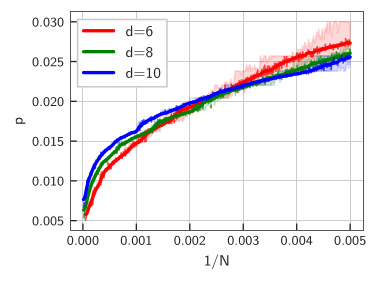

In [113]:
decoder_a, decoder_b = 'uf','clayg'
eps = 0.05

df_a = data_mean[data_mean['decoder']==decoder_a]
df_b = data_mean[data_mean['decoder']==decoder_b]
merged = pd.merge(df_a, df_b, on=['distance','p','N'], suffixes=('_a','_b'))
merged['inv_N'] = 1/merged['N']
merged['rel_diff'] = (merged['l_a'] - merged['l_b']) / (0.5*(merged['l_a']+merged['l_b']))

distances = sorted(merged['distance'].unique())
colors = ["r","g","b","m","c"]

fig = plot_setup(aspect_ratio=0.75, width_ratio=1.0, wide=False)
ax = fig.add_subplot(1, 1, 1)

for i,d in enumerate(distances):
    df_d = merged[merged['distance']==d]
    color = colors[i % len(colors)]
    
    # near-zero band
    band_points = []
    for invN, group in df_d.groupby('inv_N'):
        group = group.sort_values('p')
        near = group[np.abs(group['rel_diff']) < eps]
        if not near.empty:
            band_points.append((invN, near['p'].min(), near['p'].max()))
    if band_points:
        band_points = np.array(sorted(band_points, key=lambda x: x[0]))
        x = band_points[:,0]
        y_low = uniform_filter1d(band_points[:,1], size=5)
        y_high = uniform_filter1d(band_points[:,2], size=5)
        ax.fill_between(x, y_low, y_high, color=color, alpha=0.15)
    
    # Threshold lines
    thresholds =  compute_thresholds(df_d)
    if thresholds is not None:
        thresholds = np.array(sorted(thresholds, key=lambda t: t[0]))
        x = thresholds[:,0]
        y = thresholds[:,1]
        y_smooth = uniform_filter1d(y, size=20)
        ax.plot(x, y, color=color, linestyle='--', alpha=0.7)
        ax.plot(x, y_smooth, color=color, linewidth=2, label=f"d={d}")

ax.set_xlabel('1/N')
ax.set_ylabel('p')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.savefig("../paper/figures/idling_threshold_comparison_plot.pdf")

fig

/tmp/ipykernel_5386/126125950.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  steps = data.steps[data.steps['occurences']>=1000].groupby(['decoder', 'distance', 'p']).apply(lambda x: x.set_index('value')['occurences'].to_dict()).to_dict()


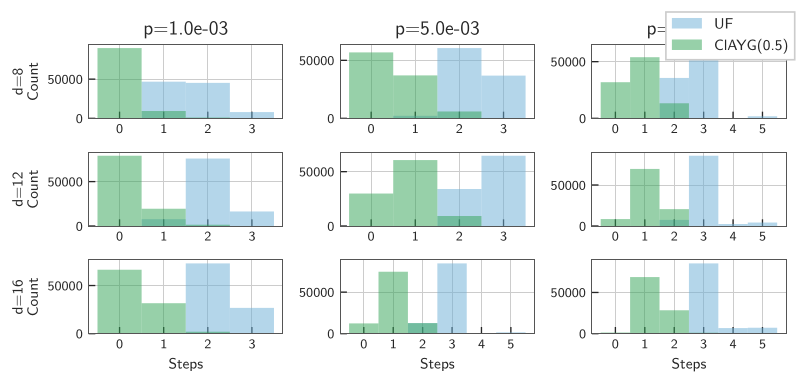

In [60]:
base_dirs = [
    "../data/ccluster/steps_PAPER/steps_cluster_lifetime",
]

data = collect_data(base_dirs, [])

steps = data.steps[data.steps['occurences']>=1000].groupby(['decoder', 'distance', 'p']).apply(lambda x: x.set_index('value')['occurences'].to_dict()).to_dict()

selected_decoders=['uf', 'clayg_lifetime_0.5']
selected_distances=[8,12,16]
selected_ps=[0.001, 0.005, 0.01]

all_keys = list(steps.keys())
decoders = selected_decoders if selected_decoders else sorted({d for d, _, _ in all_keys})
distances = selected_distances if selected_distances else sorted({dist for _, dist, _ in all_keys})

all_ps = sorted({p for _, _, p in all_keys})
ps_to_plot = selected_ps if selected_ps else all_ps

n_rows = len(distances)
n_cols = len(ps_to_plot)

# Use plot_setup to create figure with correct aspect ratio
fig = plot_setup(aspect_ratio=0.5*n_rows/n_cols, width_ratio=1.0, wide=True)

axes = []
for i in range(n_rows):
    row_axes = []
    for j in range(n_cols):
        ax = fig.add_subplot(n_rows, n_cols, i*n_cols + j + 1)
        row_axes.append(ax)
    axes.append(row_axes)

for i, distance in enumerate(distances):
    for j, p in enumerate(ps_to_plot):
        ax = axes[i][j]
        for decoder in decoders:
            key = (decoder, distance, p)
            if key not in steps:
                continue
            counts = steps[key]
            x = []
            for step_val, count in counts.items():
                x.extend([step_val]*count)
            if not x:
                continue
            min_val, max_val = min(x), max(x)
            bins = np.arange(min_val, max_val + 2) - 0.5  # integer bins centered on step values

            color = decoder_colors.get(decoder, ['#000000'])[0]
            ax.hist(x, bins=bins, alpha=0.5, color=color, label=decoder_names.get(decoder, decoder), align='mid')
        
        if i == 0:
            ax.set_title(f"p={p:.1e}")
        if j == 0:
            ax.set_ylabel(f"d={distance}\nCount")
        if i == n_rows-1:
            ax.set_xlabel("Steps")
        ax.grid(True)
        
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

handles, labels = axes[0][0].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 0.95))

fig.tight_layout(rect=[0,0,1,0.95])

plt.savefig("../paper/figures/steps_histograms.pdf")

fig

/tmp/ipykernel_5386/1775903162.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_median)
/tmp/ipykernel_5386/1775903162.py:40: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x['value'], weights=x['occurences']))


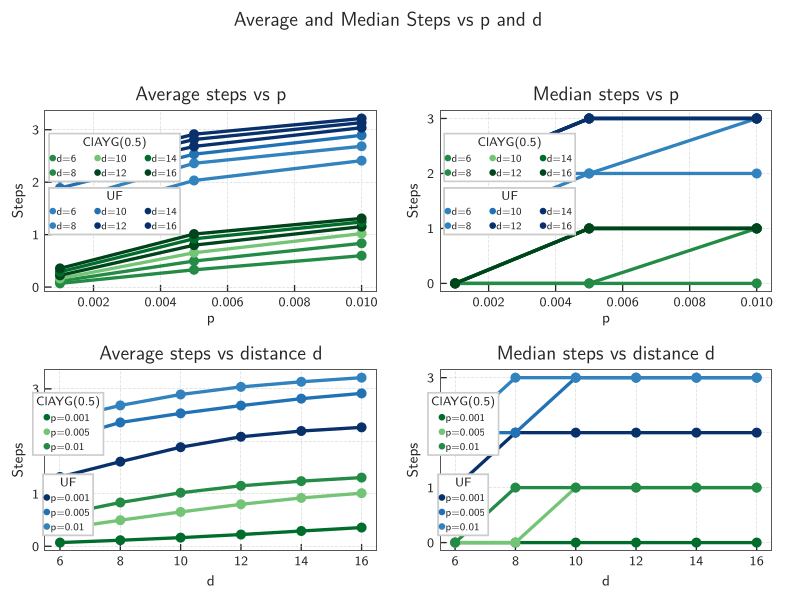

In [71]:
base_dirs = [
    "../data/ccluster/steps_PAPER/steps_cluster_lifetime",
]

data = collect_data(base_dirs, [])

data.steps = data.steps[data.steps['decoder'].isin(['uf', 'clayg_lifetime_0.5'])]

def weighted_median(df):
    expanded = []
    for value, count in zip(df['value'], df['occurences']):
        expanded.extend([value] * count)
    return np.median(expanded)

median_steps = (
    data.steps
    .groupby(['decoder', 'distance', 'p'])
    .apply(weighted_median)
    .reset_index(name='avg_steps')
)

median_steps_by_d = (
    median_steps
    .pivot_table(index=['decoder', 'p'], columns='distance', values='avg_steps')
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)

median_steps_by_p = (
    median_steps
    .pivot_table(index=['decoder', 'distance'], columns='p', values='avg_steps')
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)


avg_steps = (
    data.steps
    .groupby(['decoder', 'distance', 'p'])
    .apply(lambda x: np.average(x['value'], weights=x['occurences']))
    .reset_index(name='avg_steps')
)

average_steps_by_d = (
    avg_steps
    .pivot_table(index=['decoder', 'p'], columns='distance', values='avg_steps')
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)

average_steps_by_p = (
    avg_steps
    .pivot_table(index=['decoder', 'distance'], columns='p', values='avg_steps')
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)

from matplotlib.lines import Line2D

fig = plot_setup(aspect_ratio=0.75, width_ratio=1.0, wide=True)
axes = fig.subplots(2, 2)
axes = axes.flatten()

titles = [
    "Average steps vs p",
    "Median steps vs p",
    "Average steps vs distance d",
    "Median steps vs distance d",
]

plots_data = [
    (average_steps_by_p, "p", "d"),
    (median_steps_by_p, "p", "d"),
    (average_steps_by_d, "d", "p"),
    (median_steps_by_d, "d", "p"),
]

for ax, (data_dict, x_label, legend_label), title in zip(axes, plots_data, titles):
    grouped_lines = {}

    for (decoder, key), values in data_dict.items():
        colors = decoder_colors.get(decoder, decoder_colors['other'])
        decoder_name = decoder_names.get(decoder, decoder)
        x = np.array(sorted(values.keys()))
        y = np.array([values[k] for k in x])

        color = colors[int(np.abs(hash(str(key))) % len(colors))]
        line, = ax.plot(
            x, y,
            marker='o',
            linestyle='-',
            color=color,
            linewidth=2,
            markersize=5,
        )
        grouped_lines.setdefault(decoder_name, []).append((line, key))

    ax.set_xlabel(x_label)
    ax.set_ylabel("Steps")
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.5)

    # === One small legend per decoder ===
    # Place them stacked vertically, but entries for each decoder side-by-side
    legend_y = 0.9  # start just above the plot
    for dec_i, (dec_name, entries) in enumerate(grouped_lines.items()):
        legend_elements = [
            Line2D([0], [0], color=line.get_color(), lw=2, marker='o', label=f"{legend_label}={key}")
            for line, key in entries
        ]
        cols = len(legend_elements)//2
        rows = len(legend_elements)//cols
        leg = ax.legend(
            handles=legend_elements,
            title=dec_name,
            loc='upper center',
            bbox_to_anchor=(0.07*cols, legend_y - 0.15 *(rows)* dec_i),
            frameon=True,
            fontsize='x-small',
            handlelength=0.1,
            handletextpad=0.3,
            borderpad=0.3,
            ncol=cols,  # side by side
            title_fontsize='small',
        )
        ax.add_artist(leg)

fig.suptitle("Average and Median Steps vs p and d", fontsize=plt.rcParams['axes.titlesize'])
fig.tight_layout(rect=[0, 0, 1, 0.94])

plt.savefig("../paper/figures/avg_median_steps.pdf")
fig